In [1]:
import nltk
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

In [2]:
# load the data
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])

C:\Users\Hitesh\Anaconda\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\Hitesh\Anaconda\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
df_english

english
0       new jersey is sometimes quiet during autumn , ...
1       the united states is usually chilly during jul...
2       california is usually quiet during march , and...
3       the united states is sometimes mild during jun...
4       your least liked fruit is the grape , but my l...
...                                                   ...
137855  france is never busy during march , and it is ...
137856  india is sometimes beautiful during spring , a...
137857  india is never wet during summer , but it is s...
137858  france is never chilly during january , but it...
137859  the orange is her favorite fruit , but the ban...

[137860 rows x 1 columns]

In [4]:
df_french

french
0       new jersey est parfois calme pendant l' automn...
1       les Ã©tats-unis est gÃ©nÃ©ralement froid en ju...
2       california est gÃ©nÃ©ralement calme en mars , ...
3       les Ã©tats-unis est parfois lÃ©gÃ¨re en juin ,...
4       votre moins aimÃ© fruit est le raisin , mais m...
...                                                   ...
137855  la france est jamais occupÃ©e en mars , et il ...
137856  l' inde est parfois belle au printemps , et il...
137857  l' inde est jamais mouillÃ© pendant l' Ã©tÃ© ,...
137858  la france est jamais froid en janvier , mais i...
137859  l'orange est son fruit prÃ©fÃ©rÃ© , mais la ba...

[137860 rows x 1 columns]

In [24]:
data=pd.concat([df_english,df_french],axis=1)

In [25]:
data.head()

english  \
0  new jersey is sometimes quiet during autumn , ...   
1  the united states is usually chilly during jul...   
2  california is usually quiet during march , and...   
3  the united states is sometimes mild during jun...   
4  your least liked fruit is the grape , but my l...   

                                              french  
0  new jersey est parfois calme pendant l' automn...  
1  les Ã©tats-unis est gÃ©nÃ©ralement froid en ju...  
2  california est gÃ©nÃ©ralement calme en mars , ...  
3  les Ã©tats-unis est parfois lÃ©gÃ¨re en juin ,...  
4  votre moins aimÃ© fruit est le raisin , mais m...

## Data cleaning

In [8]:
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hitesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hitesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

In [26]:
data['french'] = data['french'].apply(remove_punc)
data['english'] = data['english'].apply(remove_punc)

In [27]:
english_words = []
french_words  = []

In [14]:
def unique_words(x,word_list):
    for w in x.split():
        if w not in word_list:
            word_list.append(w)

In [28]:
data['french'].apply(lambda x:unique_words(x,french_words)) 
data['english'].apply(lambda x:unique_words(x,english_words))

0         None
1         None
2         None
3         None
4         None
          ... 
137855    None
137856    None
137857    None
137858    None
137859    None
Name: english, Length: 137860, dtype: object

In [30]:
french_words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'neigeux',
 'en',
 'avril',
 'les',
 'Ã©tats-unis',
 'gÃ©nÃ©ralement',
 'froid',
 'juillet',
 'gÃ¨le',
 'habituellement',
 'novembre',
 'california',
 'mars',
 'chaud',
 'juin',
 'lÃ©gÃ¨re',
 'fait',
 'septembre',
 'votre',
 'moins',
 'aimÃ©',
 'fruit',
 'le',
 'raisin',
 'mais',
 'mon',
 'la',
 'pomme',
 'son',
 'prÃ©fÃ©rÃ©',
 "l'orange",
 'paris',
 'relaxant',
 'dÃ©cembre',
 'occupÃ©',
 'au',
 'printemps',
 'jamais',
 'chaude',
 'notre',
 'citron',
 'janvier',
 'chaux',
 'des',
 'fruits',
 'banane',
 'a',
 'vu',
 'un',
 'vieux',
 'camion',
 'jaune',
 'inde',
 'pluvieux',
 'ce',
 'chat',
 'Ã©tait',
 'animal',
 'plus',
 "n'aime",
 'pamplemousse',
 'citrons',
 'verts',
 'californie',
 'ne',
 'fÃ©vrier',
 'gel',
 'chine',
 'agrÃ©able',
 'octobre',
 'merveilleux',
 'doux',
 'tranquille',
 'Ã',
 "l'automne",
 'Ã©tÃ©',
 'france',
 'mois',
 'de',
 'mai',
 'frisquet',
 'dÃ©teste',
 'raisins',
 'mang

## Data visualization

In [32]:
words = []
for i in data['english']:
  for word in i.split():
    words.append(word)


In [35]:
english_words_counts = Counter(words)
english_words_counts

Counter({'new': 12197,
         'jersey': 11225,
         'is': 205858,
         'sometimes': 37746,
         'quiet': 8693,
         'during': 74933,
         'autumn': 9004,
         'and': 59850,
         'it': 75137,
         'snowy': 8898,
         'in': 75525,
         'april': 8954,
         'the': 67628,
         'united': 11270,
         'states': 11270,
         'usually': 37507,
         'chilly': 8770,
         'july': 8956,
         'freezing': 8928,
         'november': 8951,
         'california': 11250,
         'march': 9023,
         'hot': 8639,
         'june': 9133,
         'mild': 8743,
         'cold': 8878,
         'september': 8958,
         'your': 9734,
         'least': 27564,
         'liked': 14046,
         'fruit': 27192,
         'grape': 4848,
         'but': 63987,
         'my': 9700,
         'apple': 4848,
         'his': 9700,
         'favorite': 28332,
         'orange': 4848,
         'paris': 11334,
         'relaxing': 8696,
         'decem

In [36]:
# sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [37]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [38]:
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [41]:
fig = px.bar(x = english_words, y = english_counts)
fig.show()

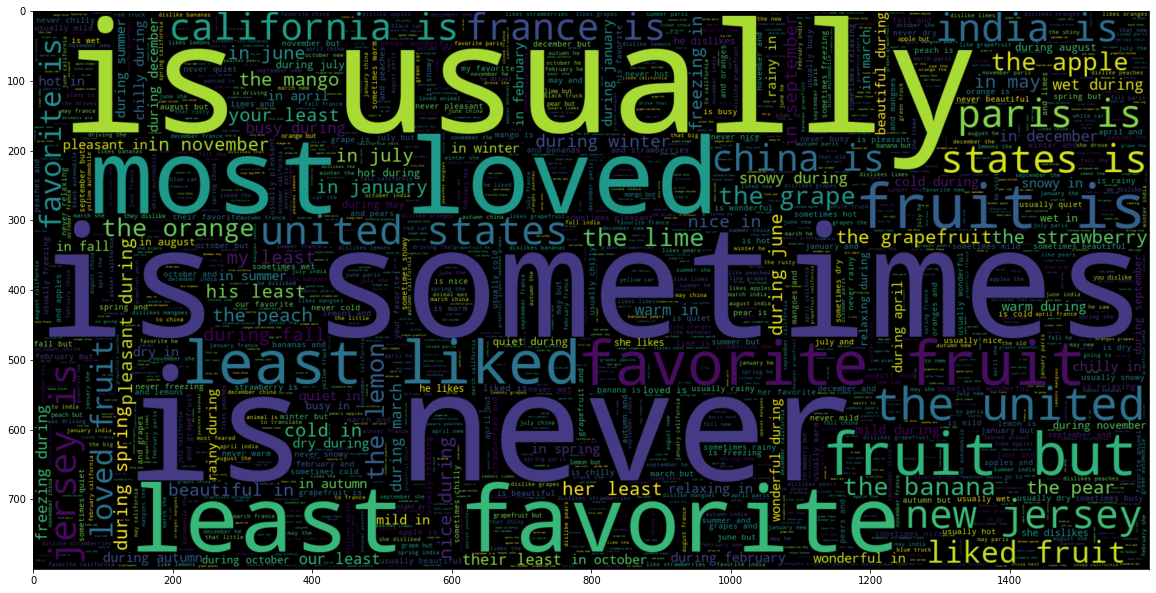

In [43]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(data.english))
plt.imshow(wc, interpolation = 'bilinear')

In [44]:
maxlen_english = -1
for doc in data.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


In [45]:
fren_words = []
for i in data['french']:
  for word in i.split():
    fren_words.append(word)

In [46]:
french_words_counts = Counter(fren_words)
french_words_counts

Counter({'new': 11047,
         'jersey': 11052,
         'est': 196809,
         'parfois': 37746,
         'calme': 7256,
         'pendant': 10741,
         "l'": 32917,
         'automne': 14727,
         'et': 59851,
         'il': 84079,
         'neigeux': 1867,
         'en': 105768,
         'avril': 8954,
         'les': 65255,
         'Ã©tats-unis': 11210,
         'gÃ©nÃ©ralement': 31292,
         'froid': 16794,
         'juillet': 8956,
         'gÃ¨le': 3622,
         'habituellement': 6215,
         'novembre': 8951,
         'california': 3061,
         'mars': 9023,
         'chaud': 16405,
         'juin': 9133,
         'lÃ©gÃ¨re': 63,
         'fait': 2916,
         'septembre': 8958,
         'votre': 9368,
         'moins': 27557,
         'aimÃ©': 25852,
         'fruit': 23626,
         'le': 35306,
         'raisin': 4852,
         'mais': 63987,
         'mon': 9403,
         'la': 49861,
         'pomme': 4848,
         'son': 16496,
         'prÃ©fÃ©rÃ©': 

In [47]:
# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [49]:
french_words = []
french_counts = []
for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

In [50]:
fig = px.bar(x = french_words, y = french_counts)
fig.show()

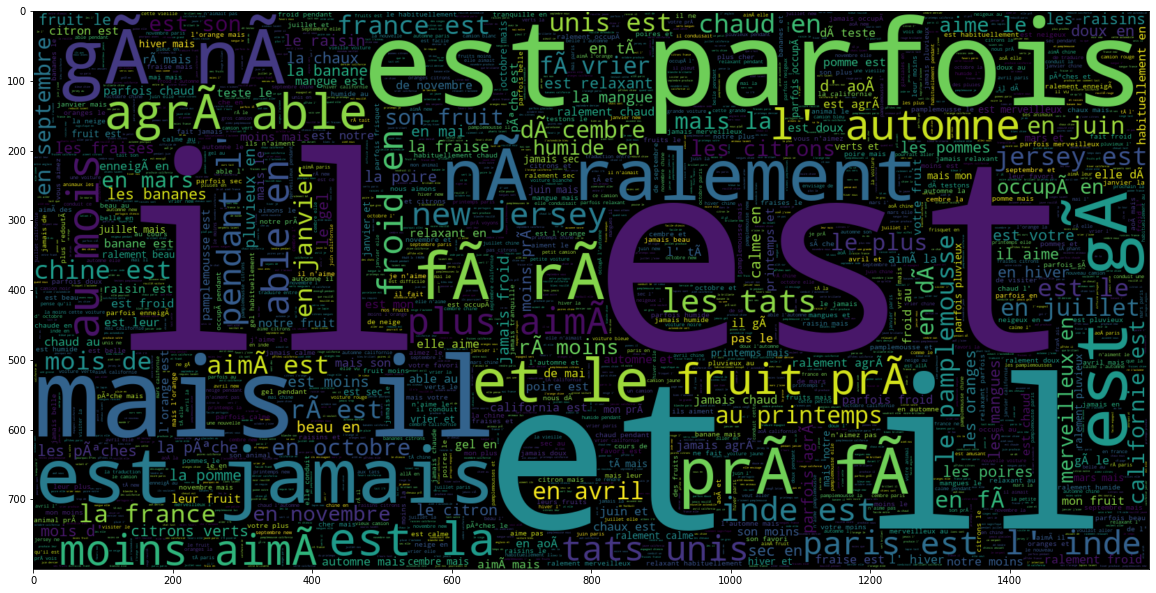

In [51]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(data.french))
plt.imshow(wc, interpolation = 'bilinear')

In [52]:
maxlen_french = -1
for doc in data.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

The maximum number of words in any document =  24


## Preparing the data

In [53]:
def tokenize_and_pad(x, maxlen):
  #  a tokenier to tokenize the words and create sequences of tokenized words
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
  return tokenizer, sequences, padded

In [72]:
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(data.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(data.french,  maxlen_french)

In [73]:
def pad_to_text(padded, tokenizer):
    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in padded])

In [74]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril          "

In [75]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

## Building and training the model

In [76]:
# Sequential Model
model = Sequential()
# embedding layer
model.add(Embedding(200, 256, input_length = maxlen_english, mask_zero = True))
# encoder
model.add(LSTM(256))
# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(351, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 256)           51200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 24, 256)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 24, 256)           525312    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 24, 351)           90207     
Total params: 1,192,031
Trainable params: 1,192,031
Non-trainable params: 0
_________________________________________________________________


In [77]:
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 24, 1)

In [78]:
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Train on 111666 samples, validate on 12408 samples
Epoch 1/10
111666/111666 [==============================] - 530s 5ms/sample - loss: 2.6102 - accuracy: 0.5170 - val_loss: 2.0624 - val_accuracy: 0.5590
Epoch 2/10
111666/111666 [==============================] - 389s 3ms/sample - loss: 1.8430 - accuracy: 0.5852 - val_loss: 1.5868 - val_accuracy: 0.6024
Epoch 3/10
111666/111666 [==============================] - 279s 2ms/sample - loss: 1.4520 - accuracy: 0.6286 - val_loss: 1.3421 - val_accuracy: 0.6460
Epoch 4/10
111666/111666 [==============================] - 278s 2ms/sample - loss: 1.2417 - accuracy: 0.6667 - val_loss: 1.1688 - val_accuracy: 0.6762
Epoch 5/10
111666/111666 [==============================] - 255s 2ms/sample - loss: 1.0845 - accuracy: 0.6974 - val_loss: 1.0178 - val_accuracy: 0.7139
Epoch 6/10
111666/111666 [==============================] - 241s 2ms/sample - loss: 0.9524 - accuracy: 0.7283 - val_loss: 0.9202 - val_accuracy: 0.7329
Epoch 7/10
111666/111666 [===========

In [79]:
# saving the model
model.save("weights.h5")

In [80]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [81]:
for i in range(5):
  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - china is usually beautiful during june but it is sometimes nice in april  

Original French word - chine est gã©nã©ralement beau en juin mais il est parfois agrã©able en avril           

Predicted French word - chine est gã©nã©ralement agrã©able en juin mais il est gã©nã©ralement en en avril           




Original English word - california is sometimes freezing during february but it is usually nice in july  

Original French word - la californie est parfois le gel en fã©vrier mais il est gã©nã©ralement agrã©able en juillet         

Predicted French word - la californie est le gel gel en mais mais il est gã©nã©ralement en en          




Original English word - the united states is quiet during april but it is never dry in winter 

Original French word - les ã©tats unis est calme en avril mais il est jamais sec en hiver          

Predicted French word - les ã©tats unis est agrã©able en avril mais il est jamais en en hiver          




Original English word